# Data Cleaning

In [4]:
import pandas as pd

# Read the dataset from a CSV file
file_path = r'C:\Users\NurAthirah\Documents\FinalYearProject\Dummy Data HSS.csv'
df = pd.read_csv(file_path)

# Display the original DataFrame
print("Original DataFrame:")
print(df)
print("\n")

# Identify and handle missing values
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)
print("\n")

# Remove rows with missing values
df.dropna(inplace=True)  # Remove rows with missing values
print("DataFrame after handling missing values:")
print(df)
print("\n")

# Removing duplicates
df.drop_duplicates(inplace=True)  # Remove duplicate rows
print("DataFrame after removing duplicates:")
print(df)
print("\n")

# change the "Influencer" column to numeric value based on the influence level
#4 for Mega, 3 for Macro, 2 for Nano, 1 for Micro
df['Influencer'].replace({'Mega': 4, 'Macro': 3, 'Nano': 2, 'Micro': 1}, inplace = True)
print(df)
print("\n")

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'Data_Clean.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to: {cleaned_file_path}")

Original DataFrame:
        TV      Radio  Social_Media Influencer       Sales
0     16.0   6.566231      2.907983       Mega   54.732757
1     13.0   9.237765      2.409567       Mega   46.677897
2     41.0  15.886446      2.913410       Mega  150.177829
3     83.0  30.020028      6.922304       Mega  298.246340
4     15.0   8.437408      1.405998      Micro   56.594181
...    ...        ...           ...        ...         ...
4567  26.0   4.472360      0.717090      Micro   94.685866
4568  71.0  20.610685      6.545573       Nano  249.101915
4569  44.0  19.800072      5.096192      Micro  163.631457
4570  71.0  17.534640      1.940873      Macro  253.610411
4571  42.0  15.966688      5.046548      Micro  148.202414

[4572 rows x 5 columns]


Missing values in the dataset:
TV              10
Radio            4
Social_Media     6
Influencer       0
Sales            6
dtype: int64


DataFrame after handling missing values:
        TV      Radio  Social_Media Influencer       Sales
0   

# TESTTTTT model

Epoch 0/1000, MSE: 45846.4475238604
Epoch 100/1000, MSE: 27.25513350893997
Epoch 200/1000, MSE: 20.80666923457663
Epoch 300/1000, MSE: 16.591537504061534
Epoch 400/1000, MSE: 13.836250526579768
Epoch 500/1000, MSE: 12.035208778148489
Epoch 600/1000, MSE: 10.857921091671614
Epoch 700/1000, MSE: 10.088357963863867
Epoch 800/1000, MSE: 9.585309122044054
Epoch 900/1000, MSE: 9.256470775526493


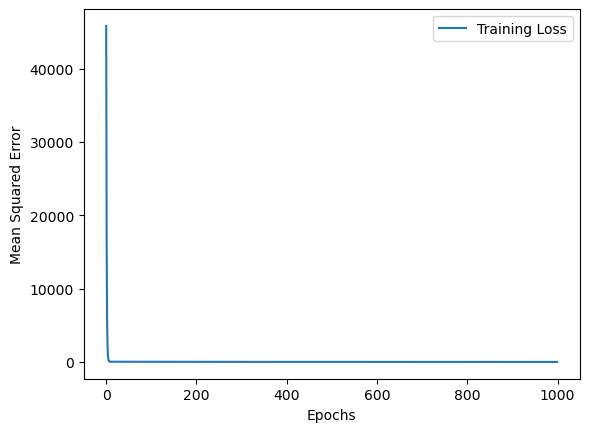

Evaluation before modification:
Mean Squared Error (MSE): 9.2765
Mean Absolute Error (MAE): 2.4333
R-squared Score (R2): 0.9989
Root Mean Squared Error (RMSE): 3.0457
Actual: 314.3113297, Predicted: 312.7608132947814
Actual: 334.2461302, Predicted: 333.309307398233
Actual: 49.49801278, Predicted: 47.21266719702436
Actual: 334.7914212, Predicted: 334.8954711337718
Actual: 214.3465426, Predicted: 217.97646352075333
Actual: 265.2172358, Predicted: 267.1976537894711
Actual: 292.313545, Predicted: 295.00943633076776
Actual: 37.069275, Predicted: 35.87694714204377
Actual: 305.1819706, Predicted: 298.90516758004975
Actual: 97.93025316, Predicted: 96.11842766952975
Actual: 240.8906045, Predicted: 236.42360248824968
Actual: 210.069569, Predicted: 212.50026726370433
Actual: 155.6302295, Predicted: 156.26480401016076
Actual: 38.86596606, Predicted: 39.06921416739949
Actual: 134.3960949, Predicted: 134.9047018227599
Actual: 124.1763504, Predicted: 124.9898390901376
Actual: 177.3087891, Predicted: 

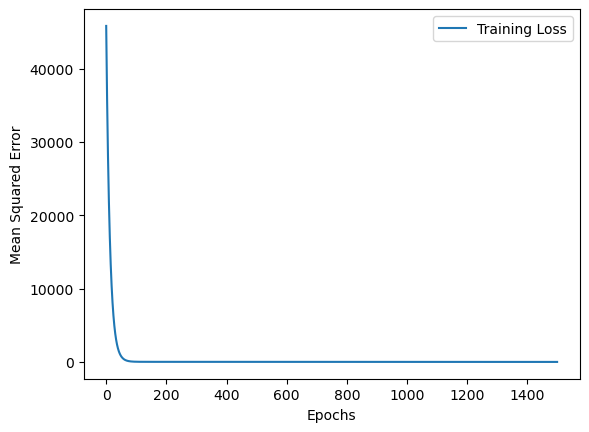


Evaluation after modification:
Mean Squared Error (MSE): 23.0017
Mean Absolute Error (MAE): 3.8781
R-squared Score (R2): 0.9973
Root Mean Squared Error (RMSE): 4.7960
Actual: 314.3113297, Predicted: 310.0773532324534
Actual: 334.2461302, Predicted: 326.3030819046125
Actual: 49.49801278, Predicted: 52.13650340722238
Actual: 334.7914212, Predicted: 336.4262206214325
Actual: 214.3465426, Predicted: 222.3237945606513
Actual: 265.2172358, Predicted: 268.25463834763275
Actual: 292.313545, Predicted: 292.541208395711
Actual: 37.069275, Predicted: 37.184575948976196
Actual: 305.1819706, Predicted: 298.2710900508596
Actual: 97.93025316, Predicted: 95.8851872934438
Actual: 240.8906045, Predicted: 244.4054489316441
Actual: 210.069569, Predicted: 206.5586429942694
Actual: 155.6302295, Predicted: 154.2171815515534
Actual: 38.86596606, Predicted: 38.36006160577602
Actual: 134.3960949, Predicted: 132.87170980811132
Actual: 124.1763504, Predicted: 126.96144737143256
Actual: 177.3087891, Predicted: 17

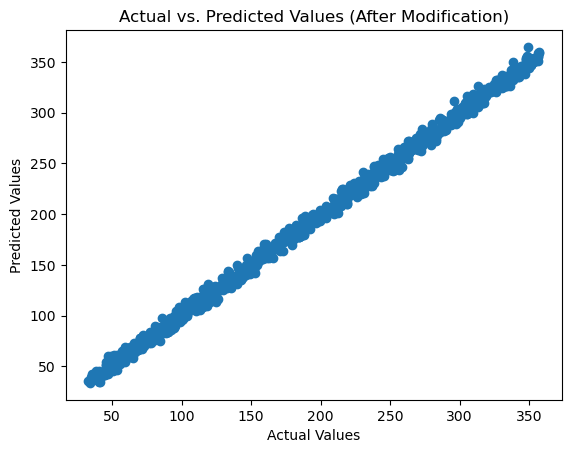

In [144]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# Define the LinearRegression class
class LinearRegression:
    def __init__(self, learning_rate=0.0001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = len(X), len(X.columns)
        self.weights = [0.0] * num_features
        self.bias = 0.0

        train_loss = []  # To store the training loss for each epoch

        for epoch in range(self.epochs):
            y_pred = self.predict(X)
            error = y_pred - y

            for j in range(num_features):
                gradient = (X.iloc[:, j] * error).mean()
                self.weights[j] -= self.learning_rate * gradient

            gradient_bias = error.mean()
            self.bias -= self.learning_rate * gradient_bias

            # Calculate and store the training loss
            mse = self.mean_squared_error(y, y_pred)
            train_loss.append(mse)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{self.epochs}, MSE: {mse}')

        # Plot the training loss over epochs
        plt.plot(range(self.epochs), train_loss, label='Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.legend()
        plt.show()

    def predict(self, X):
        return X.dot(self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return sum((y_true - y_pred) ** 2) / len(y_true)

    def r2_score(self, y_true, y_pred):
        y_mean = sum(y_true) / len(y_true)
        ss_total = sum((y_true - y_mean) ** 2)
        ss_residual = sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

    def mean_absolute_error(self, y_true, y_pred):
        return sum(abs(y_true - y_pred)) / len(y_true)

    def root_mean_squared_error(self, y_true, y_pred):
        return (sum((y_true - y_pred) ** 2) / len(y_true)) ** 0.5

# Read the data from the CSV file into a pandas dataframe
file_path = r'C:\Users\NurAthirah\Documents\FinalYearProject\Data_Clean.csv'
df = pd.read_csv(file_path)

# Extract features (X) and target variable (y) from the dataframe
X = df[['TV', 'Radio', 'Social_Media']]
y = df['Sales']

# Split the data into training and testing sets (80:20)
split_ratio = int(0.8 * len(X))
X_train, X_test = X[:split_ratio], X[split_ratio:]
y_train, y_test = y[:split_ratio], y[split_ratio:]

# Train the linear regression model before modification
model_before = LinearRegression(learning_rate=0.0001, epochs=1000)
model_before.fit(X_train, y_train)

# Save the model before modification to a pickle file
with open('linear_regression_model_before.pkl', 'wb') as file:
    pickle.dump(model_before, file)

# Test the model on the testing set before modification
X_test = X_test.fillna(0)  # Fill any NaN values in the test set with 0
predictions_before = model_before.predict(X_test)

# Evaluate the model performance before modification
r2_before = model_before.r2_score(y_test, predictions_before)
mse_before = model_before.mean_squared_error(y_test, predictions_before)
mae_before = model_before.mean_absolute_error(y_test, predictions_before)
rmse_before = model_before.root_mean_squared_error(y_test, predictions_before)

print("Evaluation before modification:")
print(f'Mean Squared Error (MSE): {mse_before:.4f}')
print(f'Mean Absolute Error (MAE): {mae_before:.4f}')
print(f'R-squared Score (R2): {r2_before:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_before:.4f}')

# Optionally, print the predicted and actual values for comparison before modification
for actual, predicted in zip(y_test, predictions_before):
    print(f'Actual: {actual}, Predicted: {predicted}')

# Modify the learning rate and epochs
new_learning_rate = 0.00001
new_epochs = 1500

# Train the linear regression model after modification
model_after = LinearRegression(learning_rate=new_learning_rate, epochs=new_epochs)
model_after.fit(X_train, y_train)

# Save the model after modification to a pickle file
with open('linear_regression_model_after.pkl', 'wb') as file:
    pickle.dump(model_after, file)

# Test the model on the testing set after modification
predictions_after = model_after.predict(X_test)

# Evaluate the model performance after modification
r2_after = model_after.r2_score(y_test, predictions_after)
mse_after = model_after.mean_squared_error(y_test, predictions_after)
mae_after = model_after.mean_absolute_error(y_test, predictions_after)
rmse_after = model_after.root_mean_squared_error(y_test, predictions_after)

print("\nEvaluation after modification:")
print(f'Mean Squared Error (MSE): {mse_after:.4f}')
print(f'Mean Absolute Error (MAE): {mae_after:.4f}')
print(f'R-squared Score (R2): {r2_after:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_after:.4f}')

# Optionally, print the predicted and actual values for comparison after modification
for actual, predicted in zip(y_test, predictions_after):
    print(f'Actual: {actual}, Predicted: {predicted}')

# Scatter plot for actual vs. predicted values after modification
plt.scatter(y_test, predictions_after)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (After Modification)')
plt.show()


In [97]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from joblib import dump, load

# Function to read data from a CSV file
def read_csv(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Assuming the first row is the header
        data = [list(map(float, row)) for row in reader]
    return header, data

# Function to calculate coefficients of simple linear regression
def coefficients(x, y):
    x_mean, y_mean = np.mean(x), np.mean(y)
    b1 = np.cov(x, y, bias=True)[0, 1] / np.var(x, ddof=1)
    b0 = y_mean - b1 * x_mean
    return b0, b1

# Function to make predictions with the simple linear regression model
def simple_linear_regression(train_x, train_y, test_x, learning_rate=0.01, epochs=1000):
    b0, b1 = 0, 0  # Initial coefficients
    n = len(train_x)
    
    for epoch in range(epochs):
        # Calculate predictions
        predictions = [b0 + b1 * x for x in train_x]
        
        # Update coefficients using gradient descent
        b0 -= learning_rate * (1/n) * sum(predictions - train_y)
        b1 -= learning_rate * (1/n) * sum((predictions - train_y) * train_x)
    
    # Make predictions on the test set
    test_predictions = [b0 + b1 * x for x in test_x]
    
    return test_predictions, {'b0': b0, 'b1': b1}

# Function to calculate metrics (R-squared, RMSE, MAE, MSE) from scratch
def evaluate_model(true_values, predicted_values):
    true_values = np.array(true_values)
    predicted_values = np.array(predicted_values)

    n = len(true_values)
    
    # Calculate R-squared
    mean_true = np.mean(true_values)
    ss_total = np.sum((true_values - mean_true)**2)
    ss_residual = np.sum((true_values - predicted_values)**2)
    r2 = 1 - (ss_residual / ss_total)

    # Calculate MSE, MAE, and RMSE
    mse = np.sum((true_values - predicted_values)**2) / n
    mae = np.sum(np.abs(true_values - predicted_values)) / n
    rmse = np.sqrt(mse)

    return r2, rmse, mae, mse

# Function to plot the graph for model accuracy
def plot_graph(true_values, predicted_values, title, ylabel):
    plt.scatter(true_values, predicted_values)
    plt.title(title)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

if __name__ == "__main__":
    # Reading data from the CSV file
    file_path = r'C:\Users\NurAthirah\Documents\FinalYearProject\Data_Clean.csv'
    header, data = read_csv(file_path)

    # Extracting columns
    x_column_index = 0  # Replace with the appropriate index for the feature column
    y_column_index = 1  # Replace with the appropriate index for the target column

    x_values = [row[x_column_index] for row in data]
    y_values = [row[y_column_index] for row in data]

    # Splitting the data into training and testing sets (90:10 ratio)
    train_x, test_x, train_y, test_y = train_test_split(x_values, y_values, test_size=0.1, random_state=42)

    # Making predictions on the training set with epoch and learning rate
    train_predictions, model_dict = simple_linear_regression(train_x, train_y, train_x, learning_rate=0.01, epochs=1000)

    # Calculate metrics for the training set
    r2_train, rmse_train, mae_train, mse_train = evaluate_model(train_y, train_predictions)
    print(f"Metrics on training set:")
    print(f"R-squared: {r2_train}")
    print(f"RMSE: {rmse_train}")
    print(f"MAE: {mae_train}")
    print(f"MSE: {mse_train}")

    # Save the trained model using joblib
    model_filename = 'linear_regression_model.joblib'
    dump(model_dict, model_filename)
    print(f"\nTrained model saved to {model_filename}")

    # Making predictions on the testing set with epoch and learning rate
    test_predictions, _ = simple_linear_regression(train_x, train_y, test_x, learning_rate=0.01, epochs=1000)

    # Calculate metrics for the testing set
    r2_test, rmse_test, mae_test, mse_test = evaluate_model(test_y, test_predictions)
    print(f"\nMetrics on testing set:")
    print(f"R-squared: {r2_test}")
    print(f"RMSE: {rmse_test}")
    print(f"MAE: {mae_test}")
    print(f"MSE: {mse_test}")

    # Calculate percentage accuracy for R-squared on testing set
    percentage_accuracy_r2 = r2_test * 100
    print(f"\nPercentage Accuracy for R-squared on testing set: {percentage_accuracy_r2:.2f}%")

    # Plotting the graph for the testing set
    plot_graph(test_y, test_predictions, 'Testing Set - True vs Predicted', 'Predicted Values')


# testt 2

Metrics on training set:
R-squared: 0.7587382610762714
RMSE: 4.775712163357334
MAE: 3.8201444157365585
MSE: 22.807426667239188

Trained model saved to linear_regression_model.joblib

Metrics on testing set:
R-squared: 0.720313380478441
RMSE: 4.804685359239391
MAE: 3.90609594392479
MSE: 23.085001401289357

Percentage Accuracy for R-squared on testing set: 72.03%


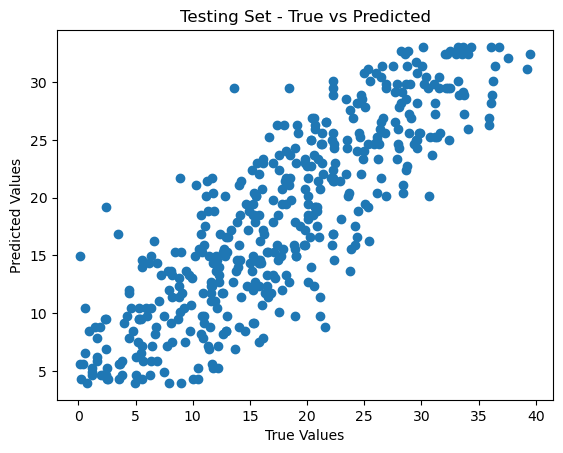

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from joblib import dump, load

# Function to read data from a CSV file
def read_csv(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Assuming the first row is the header
        data = [list(map(float, row)) for row in reader]
    return header, data

# Function to calculate coefficients of simple linear regression
def coefficients(x, y):
    x_mean, y_mean = np.mean(x), np.mean(y)
    b1 = np.cov(x, y, bias=True)[0, 1] / np.var(x, ddof=1)
    b0 = y_mean - b1 * x_mean
    return b0, b1

def simple_linear_regression(train_x, train_y, test_x):
    # Scale the input features
    scaler = StandardScaler()
    scaler.fit(np.array(train_x).reshape(-1, 1))
    scaled_train_x = scaler.transform(np.array(train_x).reshape(-1, 1))
    scaled_test_x = scaler.transform(np.array(test_x).reshape(-1, 1))

    # Calculate coefficients using scaled features
    b0, b1 = coefficients(scaled_train_x.flatten(), train_y)

    # Make predictions on the scaled test set
    predictions = [b0 + b1 * x for x in scaled_test_x.flatten()]

    return predictions, {'b0': b0, 'b1': b1, 'scaler': scaler}

# Function to calculate metrics (R-squared, RMSE, MAE, MSE) from scratch
def evaluate_model(true_values, predicted_values):
    true_values = np.array(true_values)
    predicted_values = np.array(predicted_values)

    n = len(true_values)
    
    # Calculate R-squared
    mean_true = np.mean(true_values)
    ss_total = np.sum((true_values - mean_true)**2)
    ss_residual = np.sum((true_values - predicted_values)**2)
    r2 = 1 - (ss_residual / ss_total)

    # Calculate MSE, MAE, and RMSE
    mse = np.sum((true_values - predicted_values)**2) / n
    mae = np.sum(np.abs(true_values - predicted_values)) / n
    rmse = np.sqrt(mse)

    return r2, rmse, mae, mse


# Function to plot the graph for model accuracy
def plot_graph(true_values, predicted_values, title, ylabel):
    plt.scatter(true_values, predicted_values)
    plt.title(title)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

if __name__ == "__main__":
    # Reading data from the CSV file
    file_path = r'C:\Users\NurAthirah\Documents\FinalYearProject\Data_Clean.csv'
    header, data = read_csv(file_path)

    # Extracting columns
    x_column_index = 0  # Replace with the appropriate index for the feature column
    y_column_index = 1  # Replace with the appropriate index for the target column

    x_values = [row[x_column_index] for row in data]
    y_values = [row[y_column_index] for row in data]

    # Splitting the data into training and testing sets (90:10 ratio)
    train_x, test_x, train_y, test_y = train_test_split(x_values, y_values, test_size=0.1, random_state=42)

    # Making predictions on the training set
    train_predictions, model_dict = simple_linear_regression(train_x, train_y, train_x)

    # Calculate metrics for the training set
    r2_train, rmse_train, mae_train, mse_train = evaluate_model(train_y, train_predictions)
    print(f"Metrics on training set:")
    print(f"R-squared: {r2_train}")
    print(f"RMSE: {rmse_train}")
    print(f"MAE: {mae_train}")
    print(f"MSE: {mse_train}")

    # Save the trained model using joblib
    model_filename = 'linear_regression_model.joblib'
    dump(model_dict, model_filename)
    print(f"\nTrained model saved to {model_filename}")

    # Making predictions on the testing set
    test_predictions, _ = simple_linear_regression(train_x, train_y, test_x)
        
    # Calculate metrics for the testing set
    r2_test, rmse_test, mae_test, mse_test = evaluate_model(test_y, test_predictions)
    print(f"\nMetrics on testing set:")
    print(f"R-squared: {r2_test}")
    print(f"RMSE: {rmse_test}")
    print(f"MAE: {mae_test}")
    print(f"MSE: {mse_test}")

    # Calculate percentage accuracy for R-squared on testing set
    percentage_accuracy_r2 = r2_test * 100
    print(f"\nPercentage Accuracy for R-squared on testing set: {percentage_accuracy_r2:.2f}%")

    # Plotting the graph for the testing set
    plot_graph(test_y, test_predictions, 'Testing Set - True vs Predicted', 'Predicted Values')

# Data Exploration

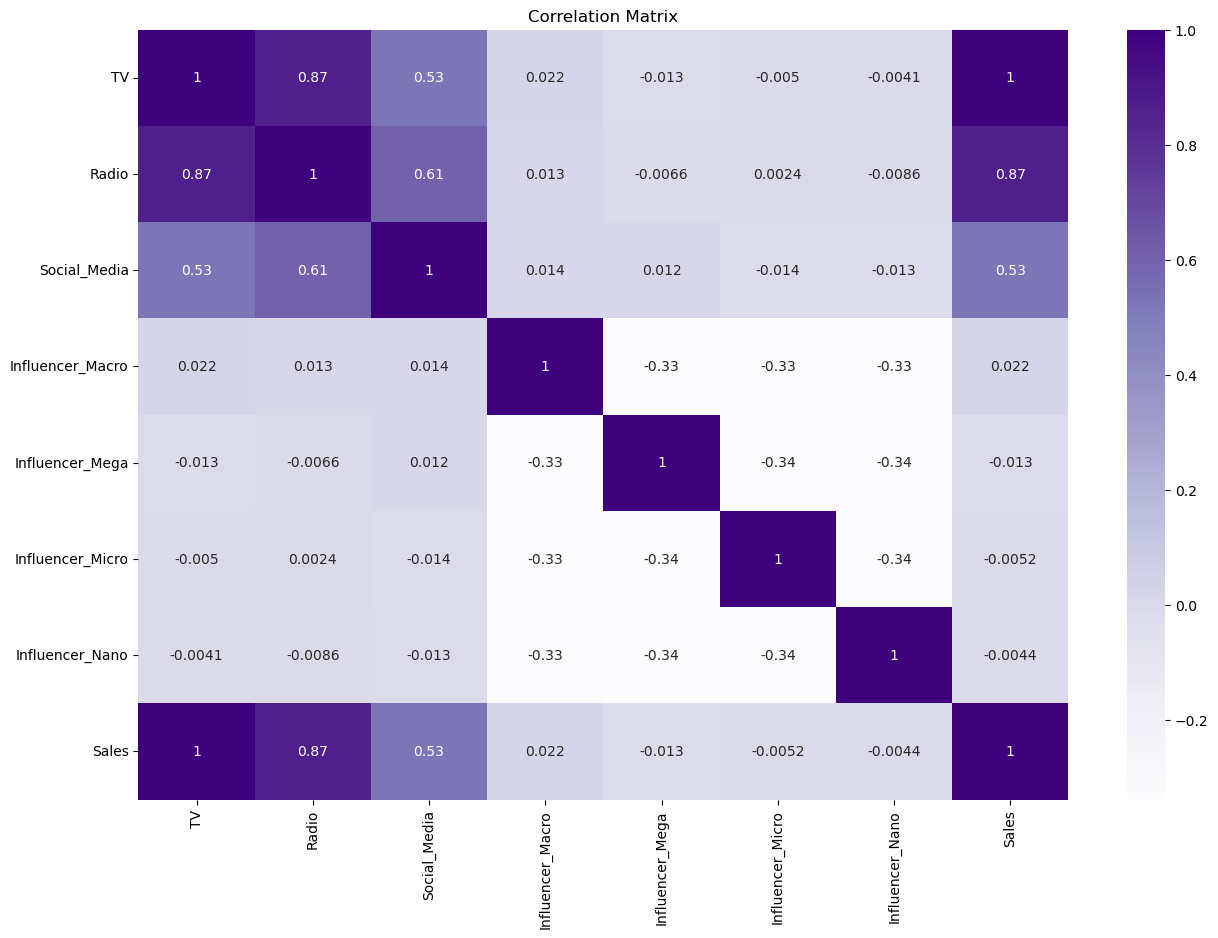

Feature Importance:
            Feature  Coefficient
0                TV     3.563366
6   Influencer_Nano    -0.056580
4   Influencer_Mega     0.048384
3  Influencer_Macro     0.034125
5  Influencer_Micro    -0.025929
2      Social_Media    -0.014578
1             Radio    -0.002578

Descriptive Statistics for Target Variable (Sales):
count    4546.000000
mean      192.413332
std        93.019873
min        31.199409
25%       112.434612
50%       188.963678
75%       272.324236
max       364.079751
Name: Sales, dtype: float64


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assume you have a DataFrame 'df' with your data and the target variable is 'y'
# Replace 'your_dataset.csv' and 'target_column_name' with your actual file path and target column name
file_path = r'C:\Users\NurAthirah\Documents\FinalYearProject\Data_Clean.csv'
df = pd.read_csv(file_path)
target_column_name = 'Sales'  # Replace with your actual target column name

# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples')
plt.title('Correlation Matrix')
plt.show()

# Separate features (X) and target variable (y)
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

# Split the data into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Get the coefficients (feature importances)
coefficients = model.coef_

# Create a DataFrame to display the coefficients along with the corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients to highlight important features
feature_importance_df['AbsoluteCoefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='AbsoluteCoefficient', ascending=False)

# Display the feature importance DataFrame
print("Feature Importance:")
print(feature_importance_df[['Feature', 'Coefficient']])

# Descriptive statistics for the target variable
print("\nDescriptive Statistics for Target Variable (Sales):")
print(df['Sales'].describe())

# Data Accuracy

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import joblib

# Load your dataset
file_path = r'C:\Users\NurAthirah\Documents\FinalYearProject\Data_Clean.csv'
df = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split the data into training and testing sets (90:10 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Ensure that the features have valid names
feature_names = X.columns

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Save the trained model to a pickle file
model_filename_pkl = 'linear_regression_model.pkl'
joblib.dump(model, model_filename_pkl)

print(f'Model saved as {model_filename_pkl}')

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Display results including accuracy and evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared Score (R2): {r2:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


Model saved as linear_regression_model.pkl
Mean Squared Error (MSE): 8.5732
Mean Absolute Error (MAE): 2.3625
R-squared Score (R2): 0.9989
Root Mean Squared Error (RMSE): 2.9280


In [44]:
import numpy as np
import pandas as pd

# Load your dataset
file_path = r'C:\Users\NurAthirah\Documents\FinalYearProject\Data_Clean.csv'
df = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = df.drop('Sales', axis=1)
y = df['Sales'].values  

# Split the data into training and testing sets (70:30 ratio)
split_index = int(0.7 * len(df))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Ensure that the features have valid names
feature_names = X.columns

# Create a linear regression model
class LinearRegressionCustom:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_ = np.column_stack((np.ones(len(X)), X))
        beta = np.linalg.inv(X_.T @ X_) @ X_.T @ y
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, X):
        return self.intercept_ + X @ self.coef_

# Custom functions for evaluation metrics
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calculate_r2(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

def calculate_rmse(y_true, y_pred):
    mse = calculate_mse(y_true, y_pred)
    return np.sqrt(mse)

# Train the model on the training set
model = LinearRegressionCustom()
model.fit(X_train.values, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train.values)

# Evaluate the model on the training set
mse_train = calculate_mse(y_train, y_train_pred)
mae_train = calculate_mae(y_train, y_train_pred)
r2_train = calculate_r2(y_train, y_train_pred)
rmse_train = calculate_rmse(y_train, y_train_pred)

# Make predictions on the testing set
y_test_pred = model.predict(X_test.values)

# Evaluate the model on the testing set
mse_test = calculate_mse(y_test, y_test_pred)
mae_test = calculate_mae(y_test, y_test_pred)
r2_test = calculate_r2(y_test, y_test_pred)
rmse_test = calculate_rmse(y_test, y_test_pred)

# Display results for training set
print("Training Metrics:")
print(f'Mean Squared Error (MSE): {mse_train:.4f}')
print(f'Mean Absolute Error (MAE): {mae_train:.4f}')
print(f'R-squared Score (R2): {r2_train:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.4f}')

# Display results for testing set
print("\nTesting Metrics:")
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'R-squared Score (R2): {r2_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')


Training Metrics:
Mean Squared Error (MSE): 8.6112
Mean Absolute Error (MAE): 2.3585
R-squared Score (R2): 0.9990
Root Mean Squared Error (RMSE): 2.9345
Percentage Accuracy: 99.90%

Testing Metrics:
Mean Squared Error (MSE): 8.8890
Mean Absolute Error (MAE): 2.3779
R-squared Score (R2): 0.9990
Root Mean Squared Error (RMSE): 2.9814


In [12]:
import tkinter as tk
from tkinter import ttk
import joblib
import numpy as np

# Load the trained linear regression model
model_filename_pkl = 'linear_regression_model.pkl'
model = joblib.load(model_filename_pkl)

def predict_sales(tv, radio, social_media, influencer_type):
    # Convert input values to numeric types
    tv = float(tv)
    radio = float(radio)
    social_media = float(social_media)
    
    # Map the influencer type to numeric value
    influencer_mapping = {'Macro': 3, 'Mega': 4, 'Micro': 1, 'Nano': 2}
    influencer_value = influencer_mapping.get(influencer_type, 0)
    
    # Create the input array
    input_data = np.array([[tv, radio, social_media, influencer_value]])
    
    # Clear previous result
    result_label.config(text='')

    # Make predictions
    prediction = model.predict(input_data)

    # Display the new prediction
    result_label.config(text=f'Predicted Sales: {prediction[0]:.2f}')

# Tkinter GUI
root = tk.Tk()
root.title('Sales Prediction')

# Labels
ttk.Label(root, text='TV:').grid(row=0, column=0, padx=5, pady=5)
ttk.Label(root, text='Radio:').grid(row=1, column=0, padx=5, pady=5)
ttk.Label(root, text='Social Media:').grid(row=2, column=0, padx=5, pady=5)
ttk.Label(root, text='Influencer Type:').grid(row=3, column=0, padx=5, pady=5)

# Entry widgets for user input
tv_entry = ttk.Entry(root)
tv_entry.grid(row=0, column=1, padx=5, pady=5)
radio_entry = ttk.Entry(root)
radio_entry.grid(row=1, column=1, padx=5, pady=5)
social_media_entry = ttk.Entry(root)
social_media_entry.grid(row=2, column=1, padx=5, pady=5)

# Dropdown menu for Influencer Type
influencer_type_var = tk.StringVar()
influencer_type_var.set('Macro')  # Default value
influencer_type_dropdown = ttk.Combobox(root, textvariable=influencer_type_var, values=['Macro', 'Mega', 'Micro', 'Nano'])
influencer_type_dropdown.grid(row=3, column=1, padx=5, pady=5)

# Button to trigger prediction
predict_button = ttk.Button(root, text='Predict', command=lambda: predict_sales(
    float(tv_entry.get()), float(radio_entry.get()), float(social_media_entry.get()), influencer_type_var.get()
))
predict_button.grid(row=4, column=0, columnspan=2, pady=10)

# Label to display the result
result_label = ttk.Label(root, text='Predicted Sales: -')
result_label.grid(row=5, column=0, columnspan=2, pady=10)

root.mainloop()


c:\Users\NurAthirah\anaconda 3.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Tkinter GUI

In [10]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import joblib
import math

class SalesPredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Sales Prediction App")

        # Load the trained model
        self.model_filename = 'linear_regression_model.joblib'
        self.model = joblib.load(self.model_filename)

        # Create and place widgets
        self.create_widgets()

    def create_widgets(self):
        # Labels and Entry widgets for budget input
        tk.Label(self.root, text="TV Budget:").grid(row=0, column=0, padx=10, pady=5)
        self.tv_budget_entry = tk.Entry(self.root)
        self.tv_budget_entry.grid(row=0, column=1, padx=10, pady=5)

        tk.Label(self.root, text="Radio Budget:").grid(row=1, column=0, padx=10, pady=5)
        self.radio_budget_entry = tk.Entry(self.root)
        self.radio_budget_entry.grid(row=1, column=1, padx=10, pady=5)

        tk.Label(self.root, text="Social Media Budget:").grid(row=2, column=0, padx=10, pady=5)
        self.social_media_budget_entry = tk.Entry(self.root)
        self.social_media_budget_entry.grid(row=2, column=1, padx=10, pady=5)

        tk.Label(self.root, text="Influencer Type (1-Micro, 2-Nano, 3-Macro, 4-Mega):").grid(row=3, column=0, padx=10, pady=5)
        self.influencer_type_entry = tk.Entry(self.root)
        self.influencer_type_entry.grid(row=3, column=1, padx=10, pady=5)

        # Button to predict sales
        tk.Button(self.root, text="Predict Sales", command=self.predict_sales).grid(row=4, column=0, columnspan=2, pady=10)

        # Display area for results
        self.result_label = tk.Label(self.root, text="")
        self.result_label.grid(row=5, column=0, columnspan=2, pady=10)

    def predict_sales(self):
        try:
            # Get user inputs
            tv_budget = float(self.tv_budget_entry.get())
            radio_budget = float(self.radio_budget_entry.get())
            social_media_budget = float(self.social_media_budget_entry.get())
            influencer_type = int(self.influencer_type_entry.get())

            # Check if inputs are numeric
            if any(math.isnan(val) or math.isinf(val) for val in [tv_budget, radio_budget, social_media_budget]):
                raise ValueError("Invalid input. Please enter numeric values.")

            # Create a DataFrame with user inputs
            user_data = pd.DataFrame({
                'TV': [tv_budget],
                'Radio': [radio_budget],
                'Social_Media': [social_media_budget],
                'Influencer': [influencer_type]
            })

            # Make predictions
            sales_prediction = self.model.predict(user_data)[0]

            # Calculate revenue for each medium
            revenue_tv = tv_budget * (sales_prediction / (tv_budget + radio_budget + social_media_budget))
            revenue_radio = radio_budget * (sales_prediction / (tv_budget + radio_budget + social_media_budget))
            revenue_social_media = social_media_budget * (sales_prediction / (tv_budget + radio_budget + social_media_budget))

            # Calculate total cost, total profit, and profit for each medium
            total_cost = tv_budget + radio_budget + social_media_budget
            total_profit = sales_prediction - total_cost
            profit_tv = revenue_tv - tv_budget
            profit_radio = revenue_radio - radio_budget
            profit_social_media = revenue_social_media - social_media_budget
            profit_influencer = 0  # Assuming no cost associated with influencer collaboration

            # Display the results
            result_text = f"Predicted Sales: {sales_prediction:.2f}\n"
            result_text += f"Total Cost: {total_cost:.2f}\n"
            result_text += f"Total Profit: {total_profit:.2f}\n\n"
            result_text += f"Revenue for TV: {revenue_tv:.2f}\n"
            result_text += f"Revenue for Radio: {revenue_radio:.2f}\n"
            result_text += f"Revenue for Social Media: {revenue_social_media:.2f}\n\n"
            result_text += f"Profit for TV: {profit_tv:.2f}\n"
            result_text += f"Profit for Radio: {profit_radio:.2f}\n"
            result_text += f"Profit for Social Media: {profit_social_media:.2f}\n"
            result_text += f"Profit for Influencer: {profit_influencer:.2f}"

            self.result_label.config(text=result_text)

        except ValueError as e:
            self.result_label.config(text=str(e))

if __name__ == "__main__":
    root = tk.Tk()
    app = SalesPredictionApp(root)
    root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\NurAthirah\anaconda 3.1\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\NurAthirah\AppData\Local\Temp\ipykernel_15976\942096290.py", line 65, in predict_sales
    sales_prediction = self.model.predict(user_data)[0]
                       ^^^^^^^^^^^^^^^^^^
AttributeError: 'dict' object has no attribute 'predict'


# HTML Website

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sales Prediction App</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            text-align: center;
            margin: 20px;
        }
        label {
            display: block;
            margin: 10px 0;
        }
        input {
            width: 200px;
            padding: 5px;
        }
        button {
            padding: 10px;
            margin-top: 10px;
            cursor: pointer;
        }
        #result {
            margin-top: 20px;
        }
    </style>
</head>
<body>
    <h2>Sales Prediction App</h2>
    
    <label for="TV">TV Budget:</label>
    <input type="text" id="TV">

    <label for="Radio">Radio Budget:</label>
    <input type="text" id="Radio">

    <label for="Social_Media">Social Media Budget:</label>
    <input type="text" id="Social_Media">

    <label for="Influencer">Influencer Type (1-Micro, 2-Nano, 3-Macro, 4-Mega):</label>
    <input type="text" id="Influencer">

    <button onclick="predictSales()">Predict Sales</button>

    <div id="result"></div>

    <script>
        function predictSales() {
            // Get user inputs
            var tv_budget = parseFloat(document.getElementById("TV").value);
            var radio_budget = parseFloat(document.getElementById("Radio").value);
            var social_media_budget = parseFloat(document.getElementById("Social_Media").value);
            var influencer_type = parseInt(document.getElementById("Influencer").value);

            // Send data to Flask backend for prediction
            fetch('http://127.0.0.1:5000/predict', {
                method: 'POST',
                headers: {
                    'Content-Type': 'application/x-www-form-urlencoded',
                },
                body: new URLSearchParams({
                    'TV': tv_budget,
                    'Radio': radio_budget,
                    'Social_Media': social_media_budget,
                    'Influencer': influencer_type,
                }),
            })
            .then(response => {
                if (!response.ok) {
                    throw new Error('Network response was not ok');
                }
                return response.json();
            })
            .then(data => {
                // Display the results
                var result_text = "Predicted Sales: " + data.Sales + "<br>";
                // Include other result details here...

                document.getElementById("result").innerHTML = result_text;
            })
            .catch(error => console.error('Error:', error));
        }
    </script>
</body>
</html>

SyntaxError: invalid decimal literal (27306067.py, line 15)

# Flanker Server

In [ ]:
from flask import Flask, render_template, request, jsonify
from flask_cors import CORS
import joblib
import pandas as pd

app = Flask(__name__)
CORS(app)

# Load the trained model
model_filename = 'linear_regression_model.pkl'
model = joblib.load(model_filename)

@app.route('/')
def index():
    return render_template('GUI.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get user inputs
        tv_budget = float(request.form['TV'])
        radio_budget = float(request.form['Radio'])
        social_media_budget = float(request.form['Social_Media'])
        influencer_type = int(request.form['Influencer'])

        # Create a DataFrame with user inputs
        user_data = pd.DataFrame({
            'TV': [tv_budget],
            'Radio': [radio_budget],
            'Social_Media': [social_media_budget],
            'Influencer': [influencer_type]
        })

        # Make predictions
        sales_prediction = model.predict(user_data)[0]

        # Prepare response
        result = {
            'Sales': round(sales_prediction, 2),
            # Include other result details here...
        }

        return jsonify(result)

    except ValueError as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\NurAthirah\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
